# **BITGRIT STUDENT CHAPTER - 2021**

# Titanic Survival Prediction



Dataset can be downloaded from [here](https://www.kaggle.com/c/titanic-dataset/data?select=titanic_train.csv)

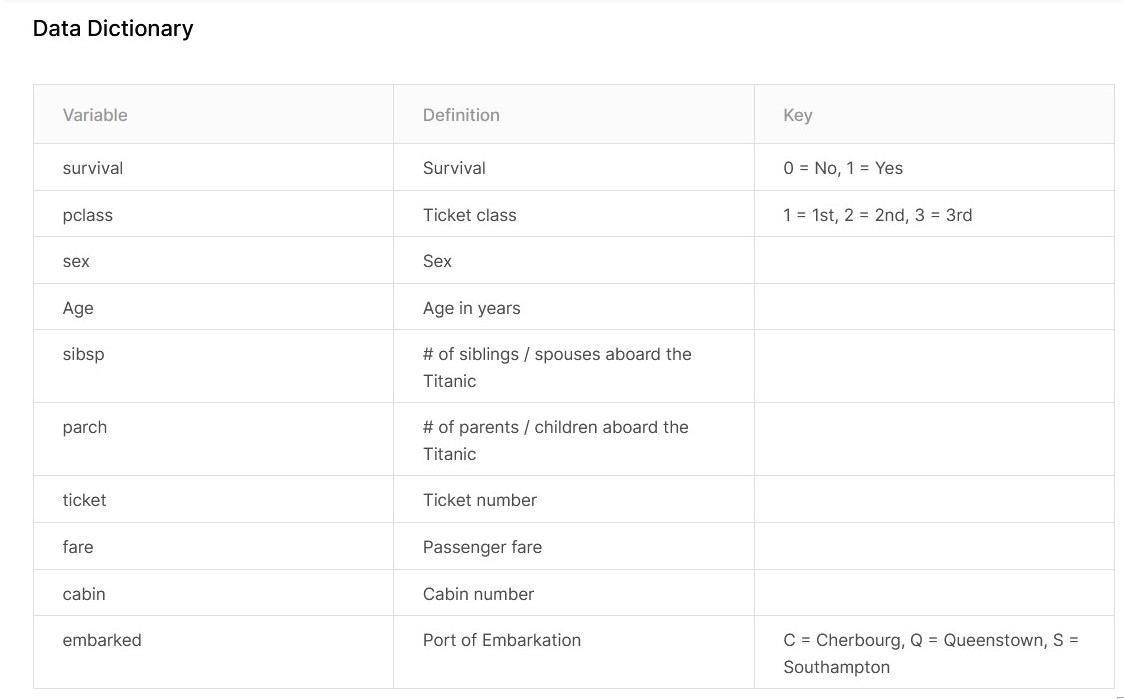

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Reading the Data

In [3]:
df = pd.read_csv('titanic_train.csv')
df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Understanding the Data

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.shape

(891, 12)

In [ ]:
df.size

10692

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
df.isnull().any

<bound method DataFrame.any of      PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 colum

# Exploratory Data Analysis(EDA)

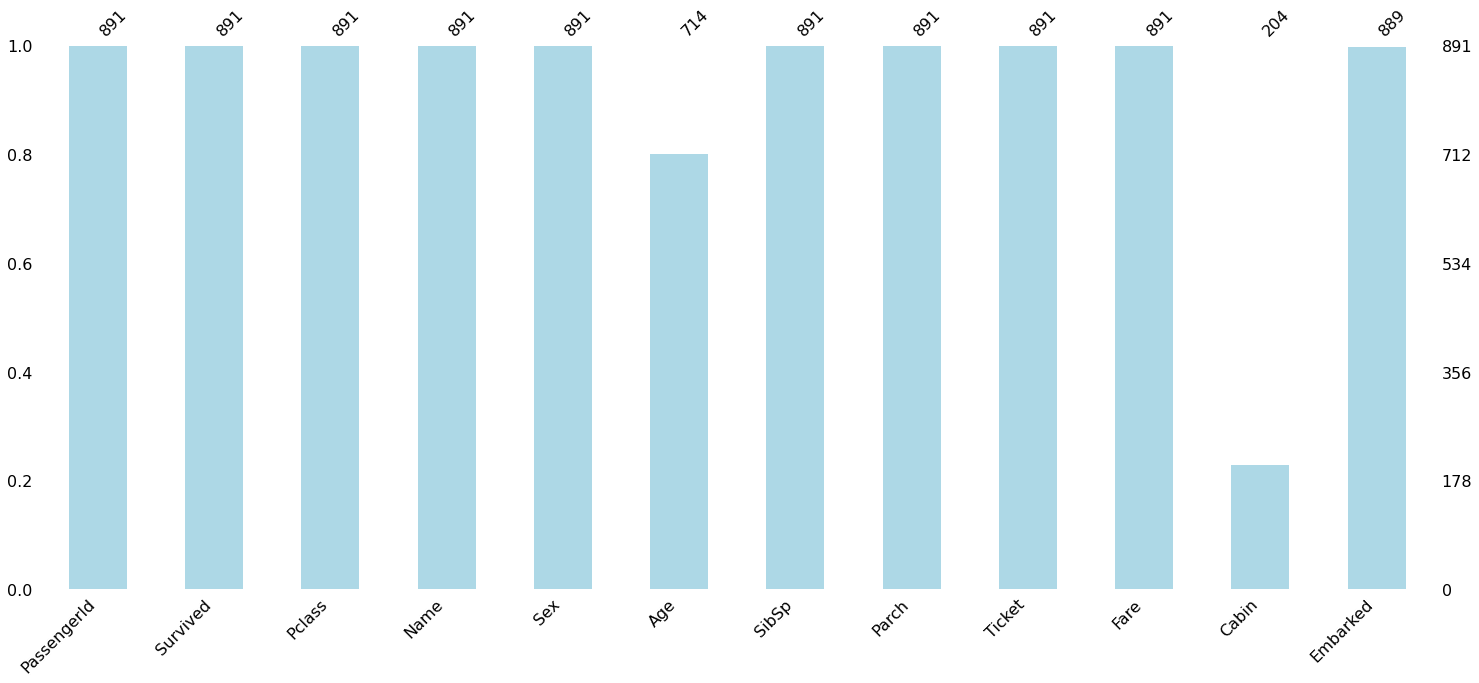

In [ ]:
import missingno as no
no.bar(df, color='Lightblue')

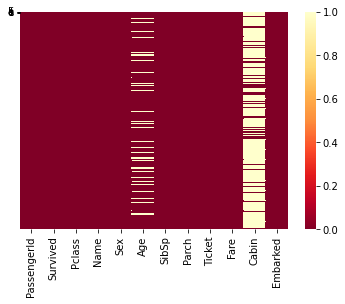

In [ ]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='YlOrRd_r')

# Handling Missing Values

In [ ]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.Age.isna().any()

False

In [ ]:
np.random.seed(42)
df['Cabin'].fillna(np.random.choice(df.Cabin.unique()), inplace=True)
df['Cabin'].isna().any()

False

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

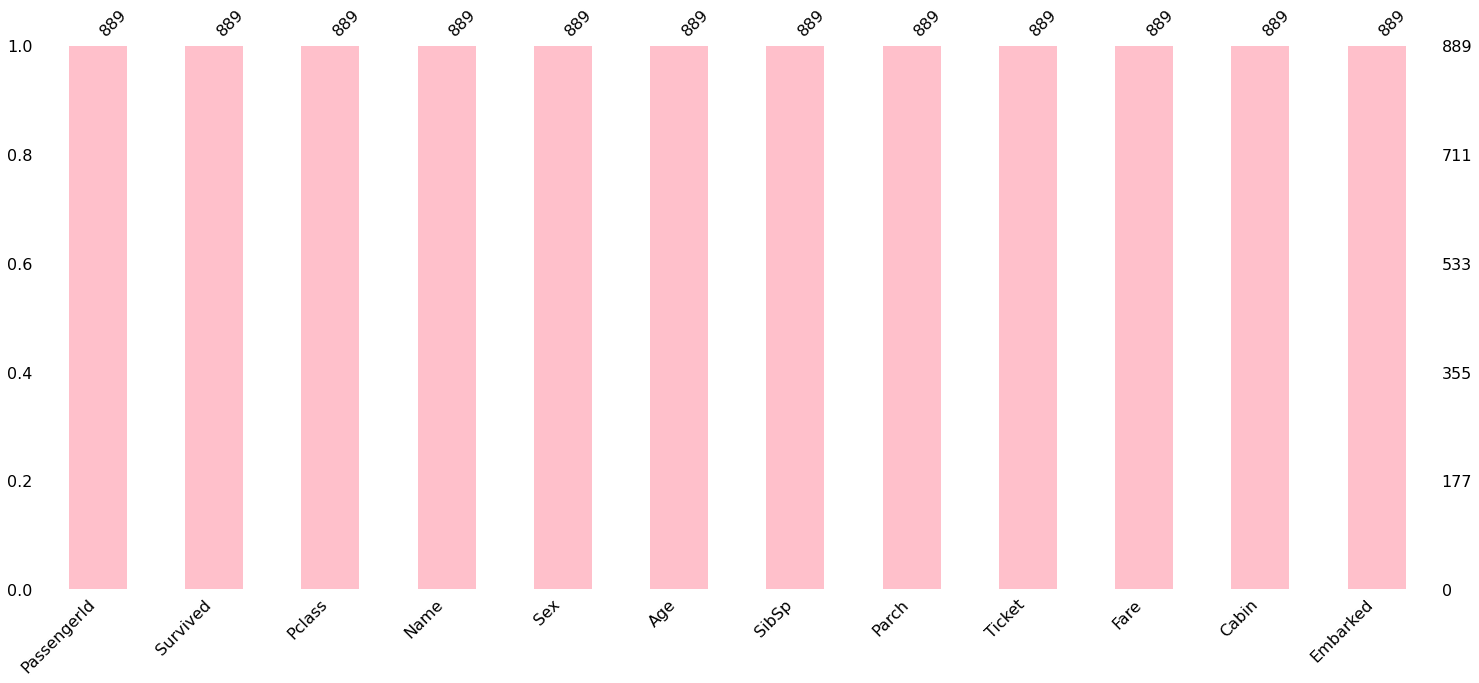

In [ ]:
import missingno as no
no.bar(df, color='pink')

In [ ]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

# Splitting the Data into Dependent and Indpendent variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Sex.unique()

array([1, 0])

In [ ]:
x = df.drop(['PassengerId',	'Survived',	'Ticket',	'Name', 'Cabin','Embarked'], axis='columns')
y = df['Survived']

In [ ]:
x[:5]

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [ ]:
y[:5]

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Training and Testing the Data

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Logistic Regression

In [ ]:
lr = LogisticRegression(random_state=20, n_jobs=5)
lr.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=5, penalty='l2', random_state=20,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

## Prediction

In [ ]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

## Confusion Matrix

In [ ]:
cm = confusion_matrix(ytest, ypred_test)
cm

array([[132,  16],
       [ 19,  56]])

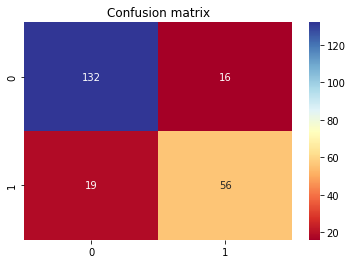

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdYlBu" ,fmt='g')
plt.title('Confusion matrix')
plt.show()

## Accuracy Score

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac1 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 78.37837837837837
Accuracy of testing data: 84.30493273542601


## Classification Score

In [ ]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       148
           1       0.34      0.37      0.36        75

    accuracy                           0.55       223
   macro avg       0.50      0.50      0.50       223
weighted avg       0.56      0.55      0.55       223





---



# Decission Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

## Prediction


In [ ]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[122,  21],
       [ 26,  54]])

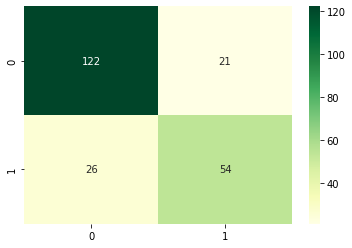

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g')

[Text(167.4, 190.26, 'X[1] <= 0.5\ngini = 0.479\nsamples = 666\nvalue = [401, 265]'), Text(83.7, 135.9, 'X[0] <= 2.5\ngini = 0.399\nsamples = 243\nvalue = [67, 176]'), Text(41.85, 81.53999999999999, 'X[2] <= 2.5\ngini = 0.108\nsamples = 122\nvalue = [7, 115]'), Text(20.925, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'), Text(62.775000000000006, 27.180000000000007, 'gini = 0.095\nsamples = 120\nvalue = [6, 114]'), Text(125.55000000000001, 81.53999999999999, 'X[5] <= 22.904\ngini = 0.5\nsamples = 121\nvalue = [60, 61]'), Text(104.625, 27.180000000000007, 'gini = 0.482\nsamples = 99\nvalue = [40, 59]'), Text(146.475, 27.180000000000007, 'gini = 0.165\nsamples = 22\nvalue = [20, 2]'), Text(251.10000000000002, 135.9, 'X[2] <= 3.5\ngini = 0.332\nsamples = 423\nvalue = [334, 89]'), Text(209.25, 81.53999999999999, 'X[3] <= 3.0\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'), Text(188.32500000000002, 27.180000000000007, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'), Text(230.175,

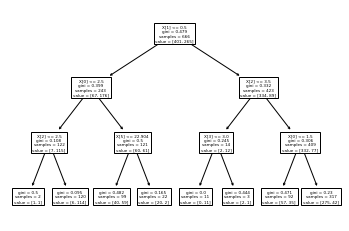

In [ ]:
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=3)
clf_tree.fit(xtrain, ytrain)
print(tree.plot_tree(clf_tree))

## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac2 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 98.04804804804806
Accuracy of testing data: 78.9237668161435


## Classification Report

In [ ]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       148
           1       0.68      0.72      0.70        75

    accuracy                           0.79       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223





---



# K Nearest Neighbour

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

## Prediction

In [ ]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

## Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[116,  34],
       [ 32,  41]])

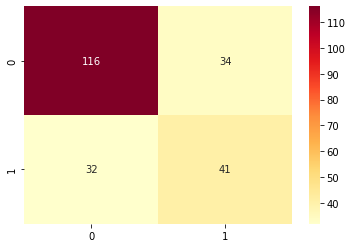

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')

## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac3 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 85.58558558558559
Accuracy of testing data: 70.4035874439462


## Classification Report

In [ ]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78       148
           1       0.56      0.55      0.55        75

    accuracy                           0.70       223
   macro avg       0.67      0.67      0.67       223
weighted avg       0.70      0.70      0.70       223





---



# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth=4)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Prediction

In [ ]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(ypred_test, ytest))
cm

array([[138,  21],
       [ 10,  54]])

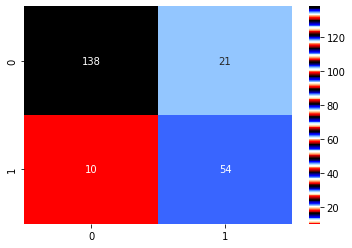

In [ ]:
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="flag" ,fmt='g')

## Accuracy

In [ ]:
print("Accuracy of training data:", accuracy_score(ytrain, ypred_train)*100)
ac4 = accuracy_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac4)

Accuracy of training data: 82.58258258258259
Accuracy of testing data: 86.09865470852019


## Classification Report

In [ ]:
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       148
           1       0.84      0.72      0.78        75

    accuracy                           0.86       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.86      0.86      0.86       223





---



# Comparing Accuracy

In [ ]:
accuracy =  {ac1: 'Logistic Regression', ac2:'Decission Tree', ac3:'KNN', ac4: 'Random Forest'}

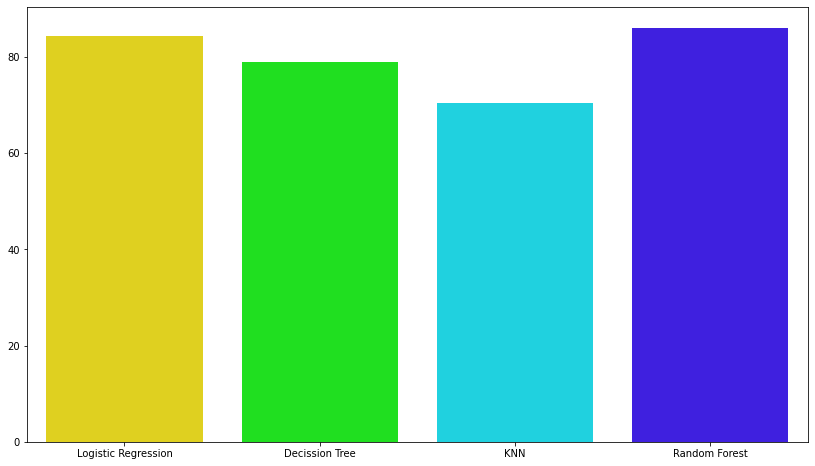

In [ ]:
plt.figure(figsize=(14,8))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='gist_rainbow');

As accuracy of Random Forest Classifier algorithm is more ie. 86.09% ~ 86%

Hence we will save the model.

# Saving the model

In [ ]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))



---

